In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Carregar os dados

# Carregando o copnjunto de dados da pasta no google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Carregar os dados
gluon_df = pd.read_csv('/content/drive/MyDrive/ML/Seminario/g_jets.csv', header=None, delimiter='\s+')
quark_df = pd.read_csv('/content/drive/MyDrive/ML/Seminario/q_jets.csv', header=None, delimiter='\s+')
top_df = pd.read_csv('/content/drive/MyDrive/ML/Seminario/t_jets.csv', header=None, delimiter='\s+')


In [ ]:
# Adicionar rótulos
gluon_df['label'] = 'gluon'
quark_df['label'] = 'quark'
top_df['label'] = 'top'

# Combinar os dados
data = pd.concat([gluon_df, quark_df, top_df], ignore_index=True)
print(data.columns)

# Definir as características e rótulos
X = data.iloc[:, :-1]
y = data['label']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Pré-processamento dos dados
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Construir o modelo de rede neural
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),  # Adicionando dropout para reduzir overfitting
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

# Compilar o modelo com uma taxa de aprendizado menor
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo por mais épocas
history = model.fit(X_train_normalized, y_train_encoded, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

# Avaliar o modelo
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded)
print('Test Accuracy:', test_accuracy)

# Previsões
y_pred = np.argmax(model.predict(X_test_normalized), axis=-1)

# Métricas de avaliação
print("Matriz de Confusão:")
print(confusion_matrix(y_test_encoded, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           111,     112,     113,     114,     115,     116,     117,     118,
           119, 'label'],
      dtype='object', length=121)
Epoch 1/50
4931/4931 [==============================] - 25s 4ms/step - loss: 0.8790 - accuracy: 0.5890 - val_loss: 0.7771 - val_accuracy: 0.6867
Epoch 2/50
4931/4931 [==============================] - 19s 4ms/step - loss: 0.7719 - accuracy: 0.6782 - val_loss: 0.7263 - val_accuracy: 0.7020
Epoch 3/50
4931/4931 [==============================] - 19s 4ms/step - loss: 0.7414 - accuracy: 0.6924 - val_loss: 0.7104 - val_accuracy: 0.7100
Epoch 4/50
4931/4931 [==============================] - 20s 4ms/step - loss: 0.7227 - accuracy: 0.7009 - val_loss: 0.6939 - val_accuracy: 0.7144
Epoch 5/50
4931/4931 [==============================] - 19s 4ms/step - loss: 0.7101 - accuracy: 0.7068 - val_loss: 0.6786 - val_accuracy: 0.7198
Epoch 6/50
4931/4931 

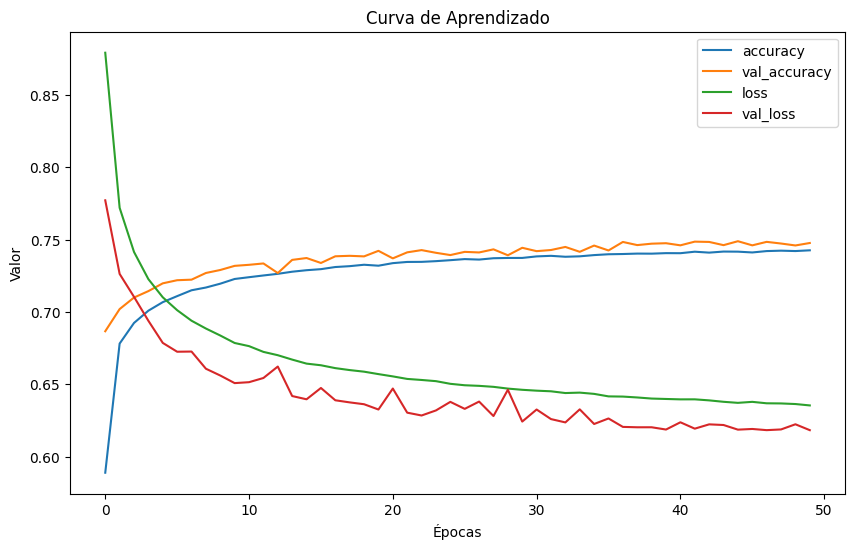

In [ ]:
# Curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Curva de Aprendizado')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.legend()
plt.show()

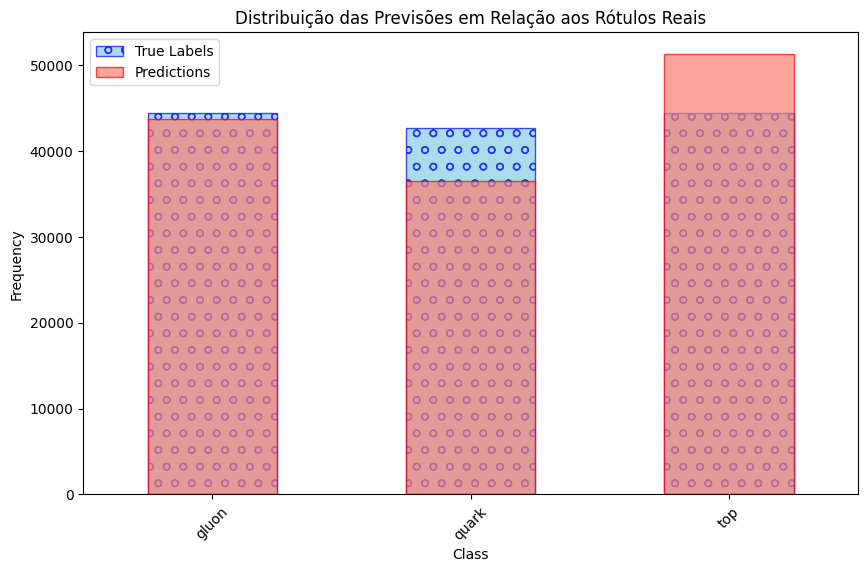

In [ ]:


# Contar as ocorrências de cada classe nos rótulos reais e nas previsões
true_counts = pd.Series(y_test).value_counts()
pred_counts = pd.Series(label_encoder.inverse_transform(y_pred)).value_counts()

# Ordenar as séries por índice (classes)
true_counts = true_counts.sort_index()
pred_counts = pred_counts.sort_index()

# Plot da distribuição das previsões em relação aos rótulos reais
plt.figure(figsize=(10, 6))
true_counts.plot(kind='bar', color='skyblue', alpha=0.7, label='Test', hatch='o', edgecolor='blue', rot=45)
pred_counts.plot(kind='bar', color='salmon', alpha=0.7, label='Predictions', edgecolor='red', rot=45)
plt.title('Distribuição das Previsões em Relação aos Rótulos Reais')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.legend()
plt.show()